# Hi!

## There are my regression tests of SVR and LinearSVR models from sklearn

### At start — let's load modules

In [20]:
# ===============
# Loading modules
# ===============

from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split

import pickle as pcl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# =======
# Warning
# =======

import warnings

# For FutureWarning and ConvergenceWarning
warnings.filterwarnings('ignore')

# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=ConvergenceWarning)

### With «pickle» module we load Data and Target from my SVC test

In [21]:
# =====================================
# Load data and target from pickle-file
# =====================================

data = pcl.load(open('data_sf.pickle', 'rb'))
target = pcl.load(open('target_sf.pickle', 'rb'))

print('data')
display(data.head(10))

print('target')
display(target.head(10))

data


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
7,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
9,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320


target


0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
5     9.5
6    21.5
7    17.5
8    10.5
9    20.5
Name: rings, dtype: float64

### OK! Data loaded great!

### Splitting Data and Targer to Train and Test sets

In [22]:
# ==========================================
# Separate data and target to train and test
# ==========================================

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

# ====================
# Print shapes of data
# ====================

print('X_train shape:\t{}'.format(X_train.shape))
print('X_test shape:\t{}'.format(X_test.shape))
print('y_train shape:\t{}'.format(y_train.shape))
print('y_test shape:\t{}'.format(y_test.shape))

X_train shape:	(3132, 8)
X_test shape:	(1045, 8)
y_train shape:	(3132,)
y_test shape:	(1045,)


### Check nude (empty-params) models SVR and LinearSVR

In [23]:
# ========
# SVR nude
# ========

svr_nude = SVR()
svr_nude.fit(X_train, y_train)

train_score = svr_nude.score(X_train, y_train)
test_score = svr_nude.score(X_test, y_test)

print(type(svr_nude).__name__)
print('Train score:\t{:.3f}'.format(train_score))
print('Test score:\t{:.3f}'.format(test_score), end='\n\n')

# =============
# LiearSVR nude
# =============

svr_nude_l = LinearSVR()
svr_nude_l.fit(X_train, y_train)

train_score_l = svr_nude_l.score(X_train, y_train)
test_score_l = svr_nude_l.score(X_test, y_test)

print(type(svr_nude_l).__name__)
print('Train score linear:\t{:.3f}'.format(train_score))
print('Test score linear:\t{:.3f}'.format(test_score), end='\n\n')

SVR
Train score:	0.423
Test score:	0.447

LinearSVR
Train score linear:	0.423
Test score linear:	0.447



### Nude models gave to us a equal results

### Go watch at graphs

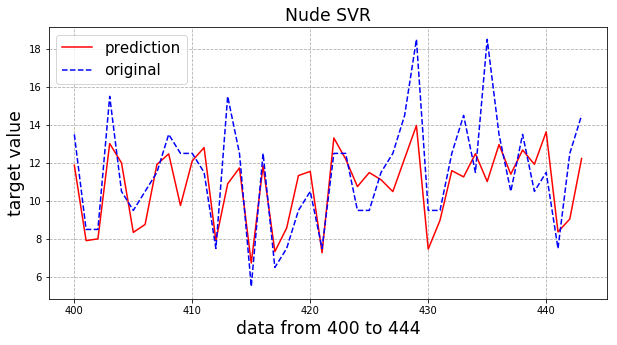

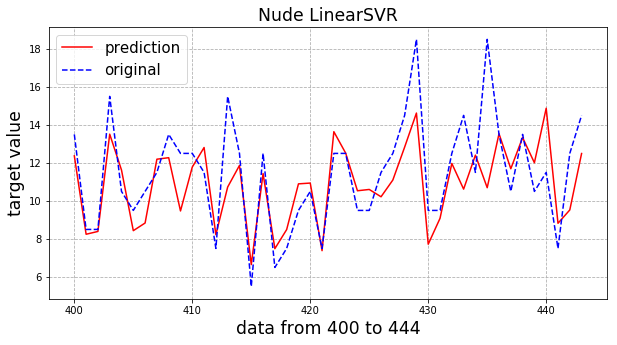

In [24]:
# ==============
# Section values
# ==============

start_dot = 400
end_dot = 444

# ===========
# Predictions
# ===========

pred_train = svr_nude.predict(X_train)
pred_train = pd.Series(pred_train)

pred_train_l = svr_nude_l.predict(X_train)
pred_train_l = pd.Series(pred_train_l)

# ===========
# Make X-line
# ===========

x_ax = np.arange(start_dot, end_dot)

# ============
# Plotting SVR
# ============

plt.figure(figsize=(10,5))

plt.plot(x_ax, pred_train[start_dot:end_dot], 'r-', label='prediction')
plt.plot(x_ax, y_train[start_dot:end_dot], 'b--', label='original')

plt.legend(loc=2, prop={'size': 15})

plt.title('Nude {}'.format(type(svr_nude).__name__), fontsize='xx-large')

plt.xlabel('data from {} to {}'.format(start_dot, end_dot), fontsize='xx-large')
plt.ylabel('target value', fontsize='xx-large')

plt.grid(linestyle='--')

plt.show()

# ==================
# Plotting LinearSVR
# ==================

plt.figure(figsize=(10,5))

plt.plot(x_ax, pred_train_l[start_dot:end_dot], 'r-', label='prediction')
plt.plot(x_ax, y_train[start_dot:end_dot], 'b--', label='original')

plt.legend(loc=2, prop={'size': 15})

plt.title('Nude {}'.format(type(svr_nude_l).__name__), fontsize='xx-large')

plt.xlabel('data from {} to {}'.format(start_dot, end_dot), fontsize='xx-large')
plt.ylabel('target value', fontsize='xx-large')

plt.grid(linestyle='--')

plt.show()

### SVR and LinearSVR have a little bit of differences
### But for 3 dot places it was not unclear

### And now we make a lists of params: «C» and «kernel»

In [25]:
# =============================
# Lists of params: Kernel and C
# =============================

list_kernel = ['rbf', 'linear', 'poly', 'sigmoid']
list_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

### Start loops to check results of our models

### LOOP: SVR | Param: kernel

rbf
Train score:	0.423
Train score:	0.447


linear
Train score:	0.480
Train score:	0.493


poly
Train score:	0.314
Train score:	0.350


sigmoid
Train score:	-2.489
Train score:	-2.484




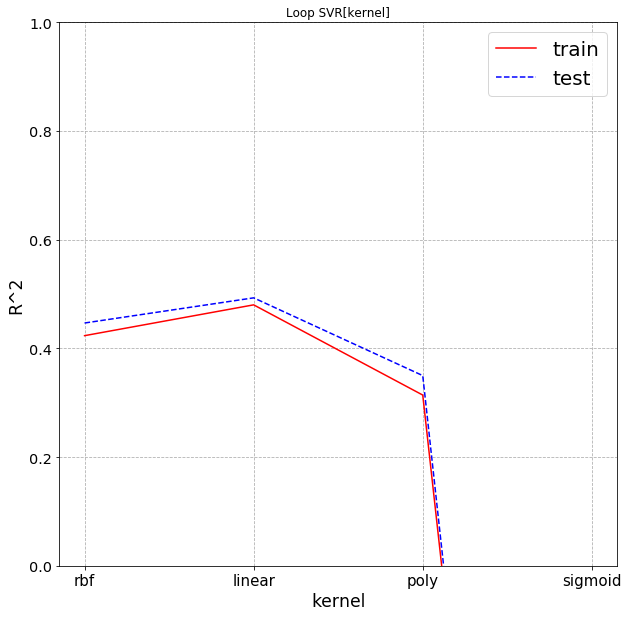

In [26]:
# ===============
# Loop kernel SVR
# ===============

train_score_array = []
test_score_array = []

for item in list_kernel:
    model = SVR(kernel=item)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_array.append(train_score)
    test_score_array.append(test_score)
    
    print(item)
    print('Train score:\t{:.3f}'.format(train_score))
    print('Train score:\t{:.3f}'.format(test_score))
    print('\n')

# ===========
# Plot making    
# ===========

plt.figure(figsize=(10,10))

plt.plot(train_score_array, 'r-', label='train')
plt.plot(test_score_array, 'b--', label='test')

plt.xticks(np.arange(len(list_kernel)), tuple(list_kernel), fontsize=15)
plt.yticks(fontsize='x-large')

plt.title('Loop SVR[kernel]')

plt.xlabel('kernel', fontsize='xx-large')
plt.ylabel('R^2', fontsize='xx-large')

plt.legend(loc='best', prop={'size': 20})
plt.ylim(top=1, bottom=0)

plt.grid(linestyle='--')

plt.show()

### LOOP: SVR | Param: C

0.001
Train score:	0.026
Train score:	0.039


0.01
Train score:	0.175
Train score:	0.199


0.1
Train score:	0.285
Train score:	0.321


1
Train score:	0.423
Train score:	0.447


10
Train score:	0.526
Train score:	0.533


100
Train score:	0.558
Train score:	0.554


1000
Train score:	0.574
Train score:	0.563


10000
Train score:	0.584
Train score:	0.563




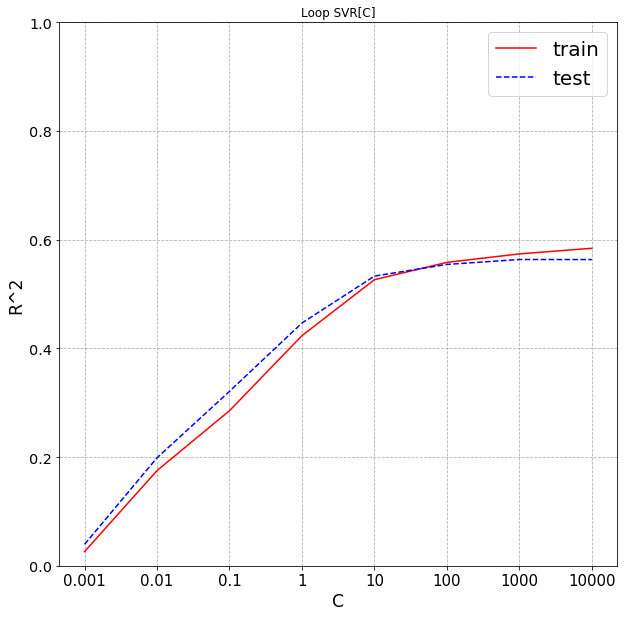

In [27]:
# ==========
# Loop C SVR
# ==========

train_score_array = []
test_score_array = []

for item in list_c:
    model = SVR(C=item)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_array.append(train_score)
    test_score_array.append(test_score)
    
    print(item)
    print('Train score:\t{:.3f}'.format(train_score))
    print('Train score:\t{:.3f}'.format(test_score))
    print('\n')

# ===========
# Plot making    
# ===========

plt.figure(figsize=(10,10))

plt.plot(train_score_array, 'r-', label='train')
plt.plot(test_score_array, 'b--', label='test')

plt.xticks(np.arange(len(list_c)), tuple(list_c), fontsize=15)
plt.yticks(fontsize='x-large')

plt.title('Loop SVR[C]')

plt.xlabel('C', fontsize='xx-large')
plt.ylabel('R^2', fontsize='xx-large')

plt.legend(loc='best', prop={'size': 20})
plt.ylim(top=1, bottom=0)

plt.grid(linestyle='--')

plt.show()

### LOOP: LinearSVR | Param: C 

0.001
Train score:	-1.176
Train score:	-1.073


0.01
Train score:	0.155
Train score:	0.202


0.1
Train score:	0.349
Train score:	0.378


1
Train score:	0.477
Train score:	0.490


10
Train score:	0.504
Train score:	0.515


100
Train score:	0.522
Train score:	0.537


1000
Train score:	0.465
Train score:	0.486


10000
Train score:	0.324
Train score:	0.320




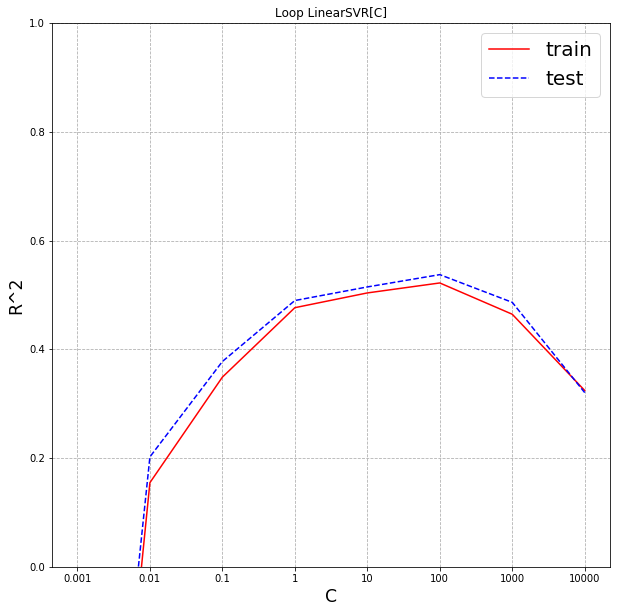

In [28]:
# ================
# Loop C linearSVR
# ================

train_score_array = []
test_score_array = []

for item in list_c:
    model = LinearSVR(C=item)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_array.append(train_score)
    test_score_array.append(test_score)
    
    print(item)
    print('Train score:\t{:.3f}'.format(train_score))
    print('Train score:\t{:.3f}'.format(test_score))
    print('\n')
    
# ===========
# Plot making    
# ===========

plt.figure(figsize=(10,10))

plt.plot(train_score_array, 'r-', label='train')
plt.plot(test_score_array, 'b--', label='test')

plt.xticks(np.arange(len(list_c)), tuple(list_c))

plt.title('Loop LinearSVR[C]')

plt.xlabel('C', fontsize='xx-large')
plt.ylabel('R^2', fontsize='xx-large')

plt.legend(loc='best', prop={'size': 20})
plt.ylim(top=1, bottom=0)

plt.grid(linestyle='--')

plt.show()

# Report

### — The best model is SVR with C: 10+
### — LinearSVR is unstable and can make a different results

![gif](gif.gif)